In [49]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Leitura e Criação de Dataframe

Aqui a gente recebe o dataset e tranforma ele em um dataframe

In [18]:
df_unistudents = pd.read_csv('../dataset/Factors_ affecting_ university_student_grades_dataset.csv', low_memory=False)
pd.set_option('display.max_columns', None)

# Observando o dataset

Fazendo as primeiras observações sobre o dataset e obtendo informações básicas

In [19]:
df_unistudents.head(10)

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,Financial_Status,Parental_Involvement,Educational_Resources,Motivation,Self_Esteem,Stress_Levels,School_Environment,Professor_Quality,Class_Size,Extracurricular_Activities,Sleep_Patterns,Nutrition,Physical_Activity,Screen_Time,Educational_Tech_Use,Peer_Group,Bullying,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades
0,22.0,F,College,50000.0,A,81.0,Medium,8.0,Law,Private,Low,High,Yes,Medium,Low,High,Negative,Medium,39.0,Yes,6.0,Unhealthy,Low,3.0,Yes,Neutral,NaN,No,Visual,Yes,NaN,Low,2.0,NaN,B
1,21.0,M,NaN,60000.0,A,NaN,Medium,12.0,Law,Public,Low,Low,Yes,NaN,High,NaN,Negative,High,75.0,Yes,5.0,Healthy,Low,9.0,No,Negative,No,No,Auditory,Yes,Yes,Medium,5.0,High,NaN
2,19.0,M,College,75000.0,C,93.0,Medium,12.0,Law,Private,Low,Medium,No,Low,Low,High,Positive,Medium,46.0,No,6.0,Unhealthy,High,7.0,No,Neutral,No,Yes,NaN,No,No,Low,2.0,High,A
3,21.0,M,College,60000.0,A,86.0,Low,15.0,Business,Public,Medium,Low,No,High,Medium,Medium,Positive,High,NaN,Yes,5.0,NaN,High,9.0,Yes,Neutral,No,NaN,Auditory,Yes,Yes,Low,3.0,Medium,C
4,19.0,NaN,NaN,40000.0,NaN,89.0,High,15.0,Medicine,NaN,Medium,Low,Yes,High,NaN,High,Negative,NaN,41.0,Yes,4.0,Unhealthy,Low,9.0,Yes,Positive,No,No,Auditory,Yes,NaN,Medium,3.0,High,B
5,19.0,M,College,40000.0,C,82.0,Medium,14.0,Law,Private,High,Low,Yes,High,High,Low,Negative,Low,NaN,No,8.0,Balanced,Medium,NaN,Yes,NaN,No,Yes,Auditory,NaN,No,Low,5.0,NaN,C
6,20.0,NaN,NaN,NaN,A,84.0,Low,13.0,Law,Private,High,Medium,No,NaN,High,High,Positive,High,82.0,NaN,7.0,Healthy,Low,5.0,No,Negative,NaN,Yes,NaN,No,No,High,5.0,Medium,A
7,21.0,M,College,40000.0,NaN,75.0,Low,5.0,Business,Public,High,Low,No,NaN,Low,High,Positive,Medium,38.0,Yes,5.0,Balanced,High,6.0,No,Positive,Yes,Yes,Visual,Yes,Yes,High,6.0,High,A
8,19.0,M,High School,75000.0,C,73.0,High,10.0,Law,Public,Low,Low,No,High,Medium,NaN,Positive,High,52.0,Yes,NaN,Unhealthy,Medium,2.0,Yes,Neutral,No,No,Auditory,No,Yes,Low,4.0,High,B
9,21.0,F,Graduate,30000.0,A,81.0,High,6.0,Arts,Private,High,Low,Yes,High,Medium,High,Neutral,NaN,41.0,No,6.0,NaN,Medium,2.0,Yes,Negative,No,No,Visual,Yes,Yes,High,2.0,High,NaN


In [20]:
df_unistudents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10064 entries, 0 to 10063
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          9099 non-null   float64
 1   Gender                       9085 non-null   object 
 2   Parental_Education           9102 non-null   object 
 3   Family_Income                9097 non-null   object 
 4   Previous_Grades              9120 non-null   object 
 5   Attendance                   9060 non-null   float64
 6   Class_Participation          9098 non-null   object 
 7   Study_Hours                  9073 non-null   float64
 8   Major                        9136 non-null   object 
 9   School_Type                  9115 non-null   object 
 10  Financial_Status             9129 non-null   object 
 11  Parental_Involvement         9118 non-null   object 
 12  Educational_Resources        9129 non-null   object 
 13  Motivation      

In [21]:
df_unistudents.describe()

,Age,Attendance,Study_Hours,Class_Size,Sleep_Patterns,Screen_Time,Time_Wasted_on_Social_Media
count,9099.000000,9060.000000,9073.000000,9114.000000,9048.000000,9120.000000,9137.000000
mean,19.996703,84.908499,12.467761,60.238754,6.538904,6.031469,3.489329
std,1.406885,8.985221,4.613845,23.337209,1.720632,2.597880,1.704057
min,18.000000,70.000000,5.000000,20.000000,4.000000,2.000000,1.000000
25%,19.000000,77.000000,9.000000,40.000000,5.000000,4.000000,2.000000
50%,20.000000,85.000000,12.000000,61.000000,7.000000,6.000000,3.000000
75%,21.000000,93.000000,16.000000,80.000000,8.000000,8.000000,5.000000
max,22.000000,100.000000,20.000000,100.000000,9.000000,10.000000,6.000000


In [22]:
df_unistudents.shape

(10064, 35)

Outra verificação importante no tratamento dos dados é a quantidade de dados duplicados do nosso dataset

In [23]:
print(df_unistudents.duplicated().sum())

0


In [73]:
df_unistudents.isnull().sum()

Age                             965
Gender                          979
Parental_Education              962
Family_Income                   967
Previous_Grades                 944
Attendance                     1004
Class_Participation             966
Study_Hours                     991
Major                           928
School_Type                     949
Financial_Status                935
Parental_Involvement            946
Educational_Resources           935
Motivation                      970
Self_Esteem                     912
Stress_Levels                   919
School_Environment              958
Professor_Quality               950
Class_Size                      950
Extracurricular_Activities      905
Sleep_Patterns                 1016
Nutrition                       977
Physical_Activity               974
Screen_Time                     944
Educational_Tech_Use            993
Peer_Group                      919
Bullying                        975
Study_Space                 

# Análise Univariada - Estatísticas Descritivas

Nesta etapa, vamos explorar as estatísticas descritivas das variáveis numéricas do dataset.  
O objetivo é entender a centralidade (média, mediana), dispersão (desvio padrão, quartis) e valores extremos (mínimo, máximo) de cada variável.

### Perguntas para esta análise:
- Qual a média de tempo de tela dos alunos (`Screen_Time`)? Ela varia muito?
- Para as variáveis numéricas, existem valores extremos ou fora do esperado?
- Como se distriui as horas de estudo (`Study_Hours`)?

In [47]:
num_col=df_unistudents.select_dtypes(include=['float64']).columns # identifica as colunas numéricas

df_unistudents[num_col].describe() # descreve-as

,Age,Attendance,Study_Hours,Class_Size,Sleep_Patterns,Screen_Time,Time_Wasted_on_Social_Media
count,9099.000000,9060.000000,9073.000000,9114.000000,9048.000000,9120.000000,9137.000000
mean,19.996703,84.908499,12.467761,60.238754,6.538904,6.031469,3.489329
std,1.406885,8.985221,4.613845,23.337209,1.720632,2.597880,1.704057
min,18.000000,70.000000,5.000000,20.000000,4.000000,2.000000,1.000000
25%,19.000000,77.000000,9.000000,40.000000,5.000000,4.000000,2.000000
50%,20.000000,85.000000,12.000000,61.000000,7.000000,6.000000,3.000000
75%,21.000000,93.000000,16.000000,80.000000,8.000000,8.000000,5.000000
max,22.000000,100.000000,20.000000,100.000000,9.000000,10.000000,6.000000


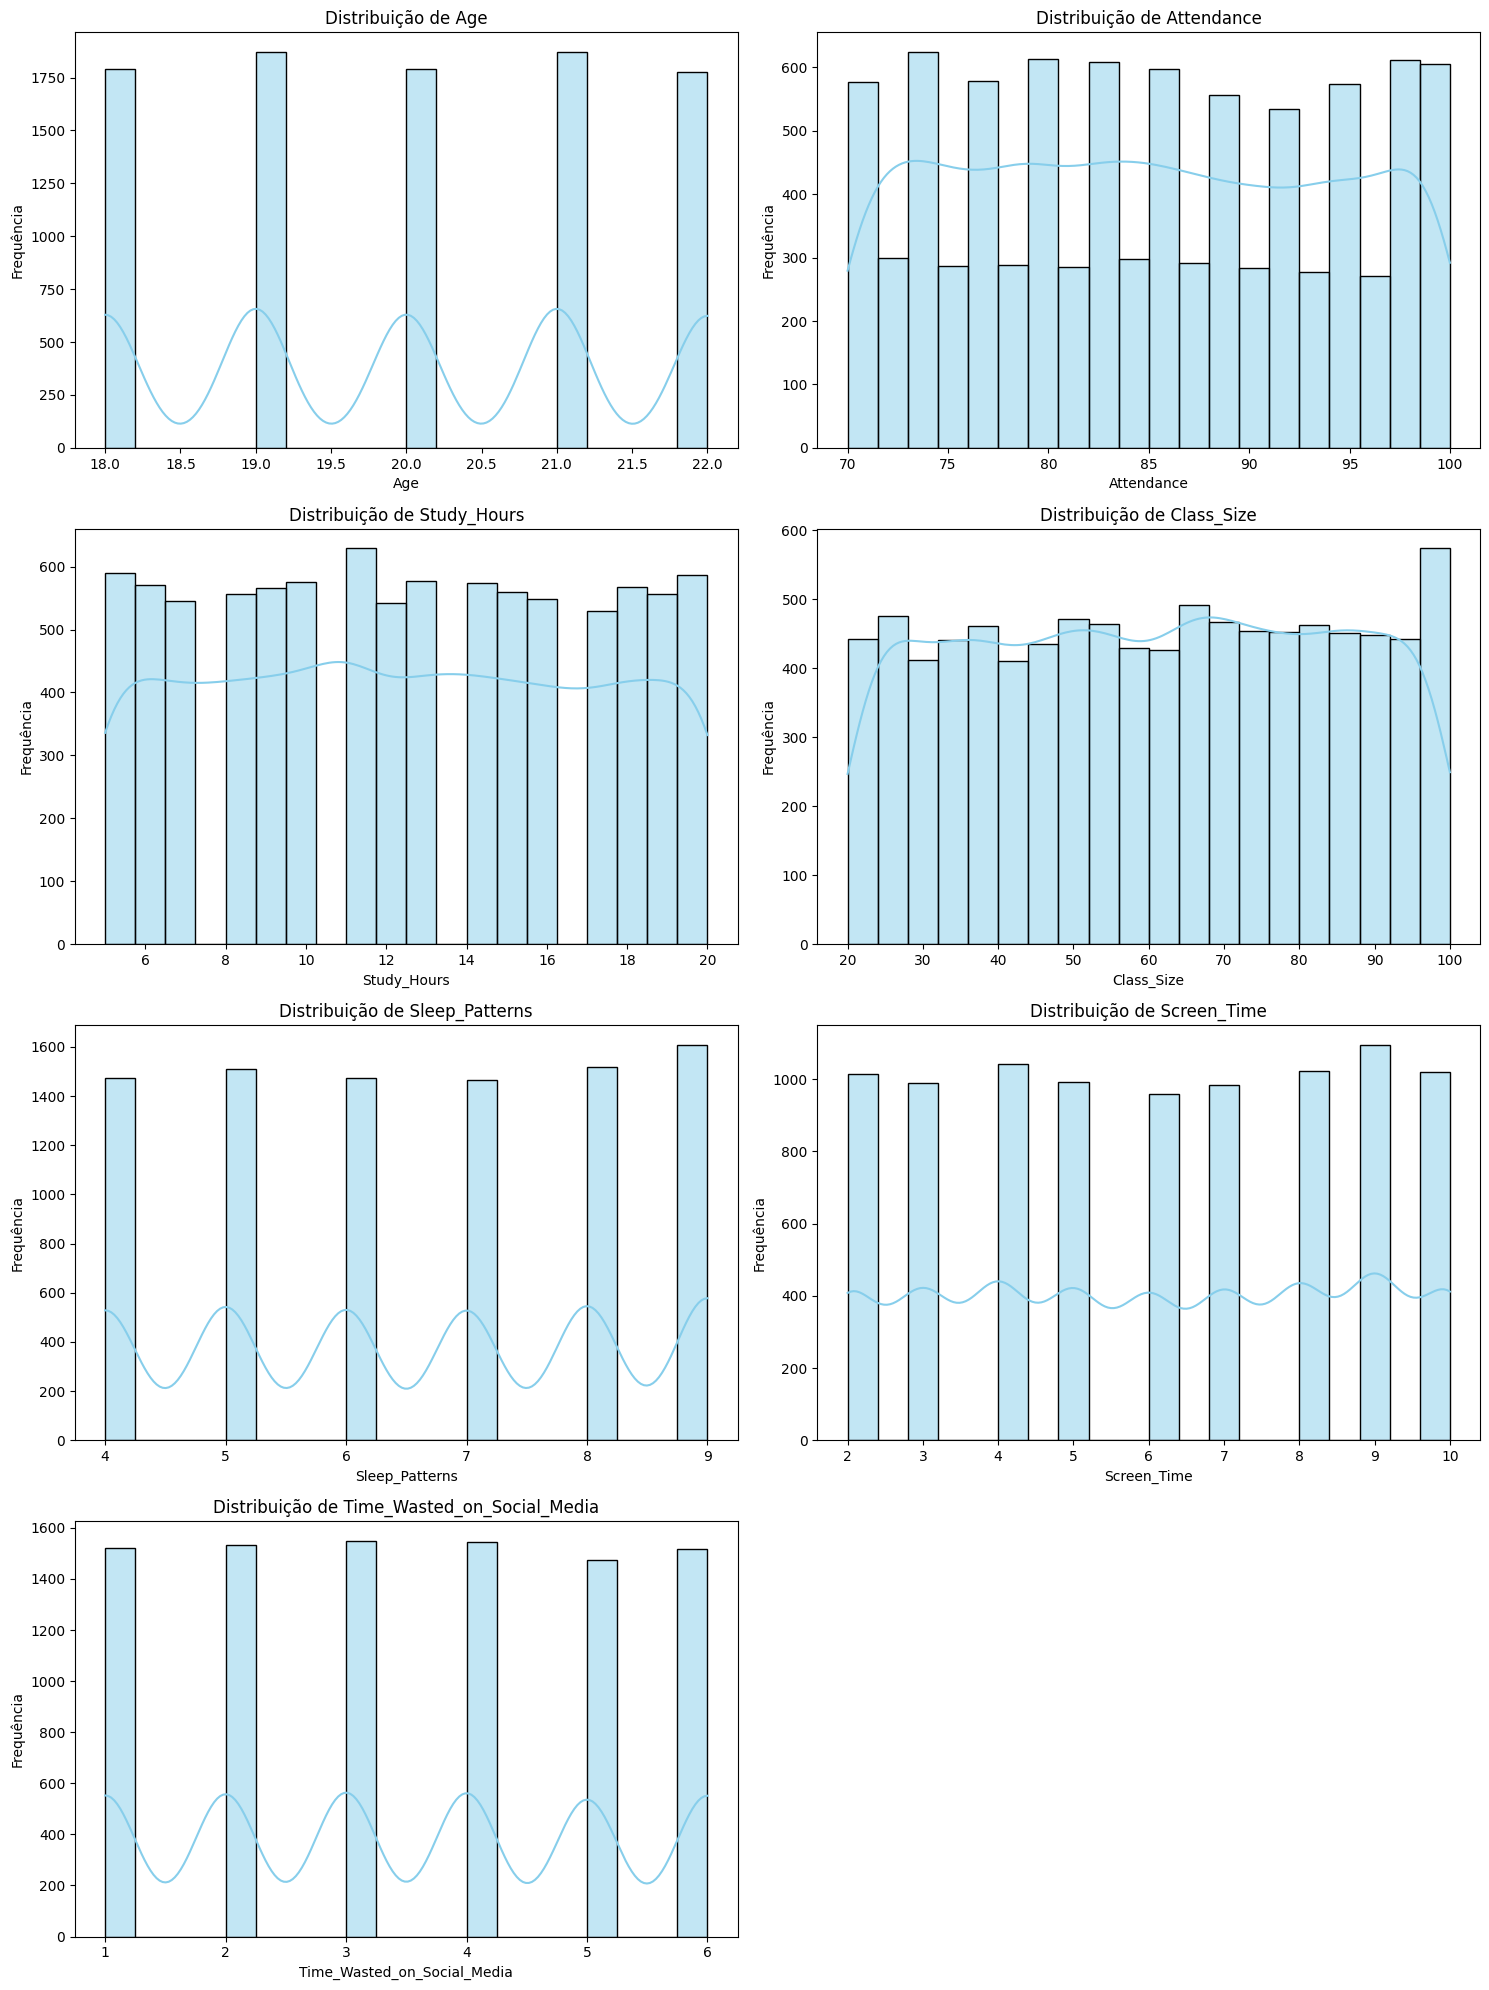

In [53]:
lista_num_col = num_col.tolist()
num_vars = lista_num_col

num_plots = len(num_vars)
num_cols = 2
num_linhas = math.ceil(num_plots / num_cols)

plt.figure(figsize=(15, 5 * num_linhas))
for i, var in enumerate(num_vars, 1):
    plt.subplot(num_linhas, num_cols, i)
    sns.histplot(df_unistudents[var], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

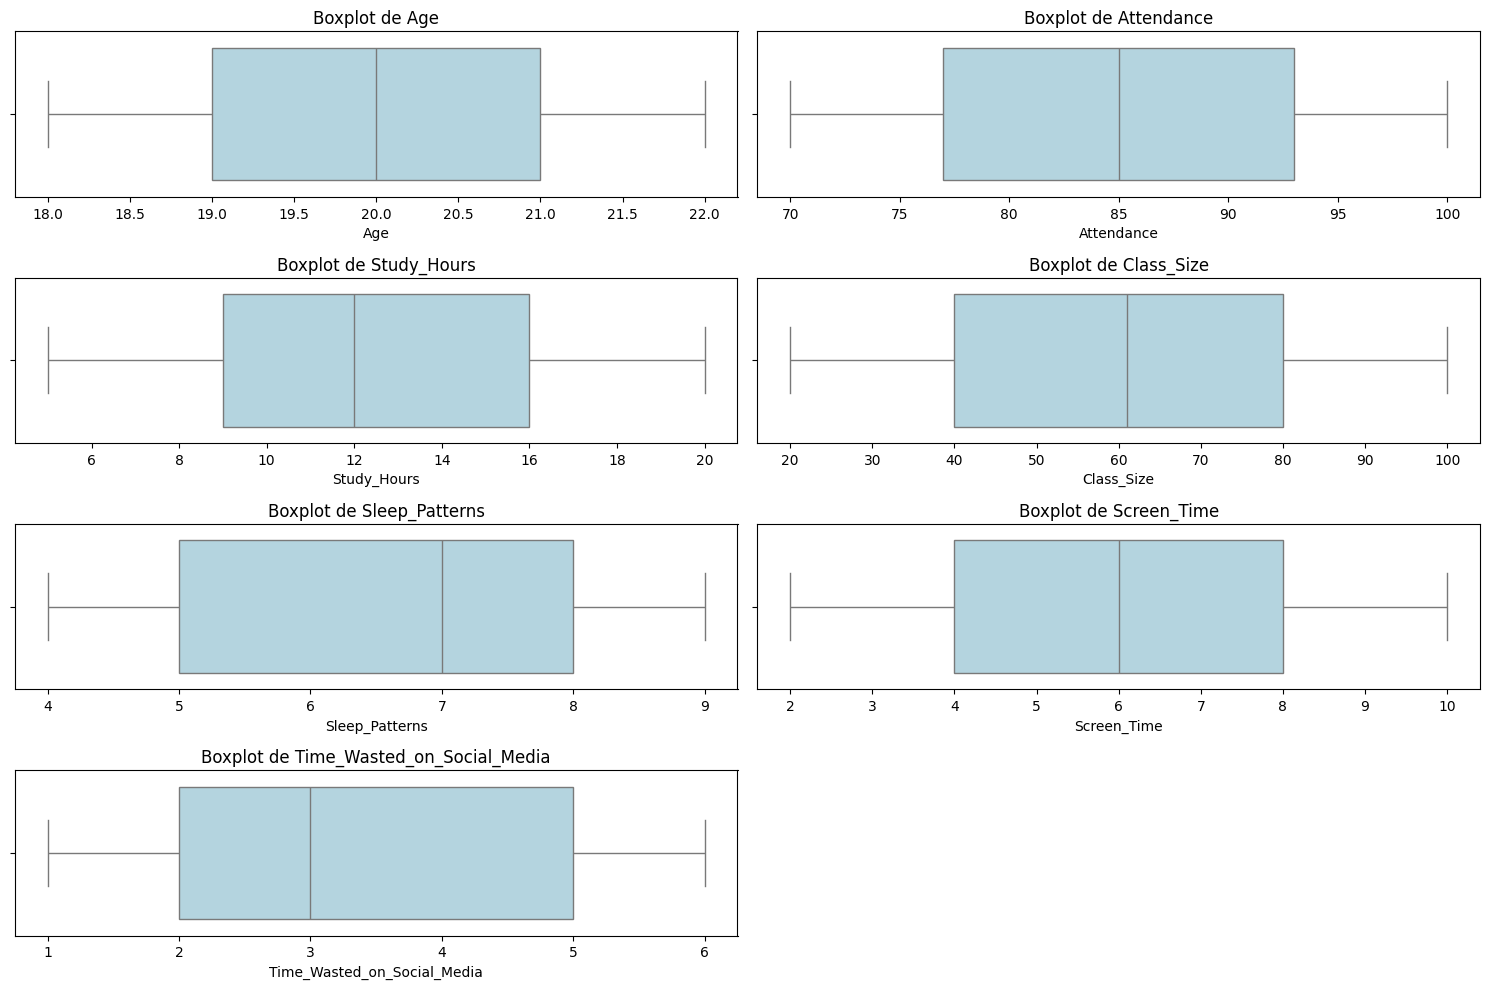

In [55]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(num_vars, 1):
    plt.subplot(num_linhas, num_cols, i)
    sns.boxplot(x=df_unistudents[var], color='lightblue')
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

Aqui podemos observar que não há outliers presentes nas colunas numéricas, o que é um bom indicativo, contudo, vale ressaltar que ainda falta transformar umas série de colunas de texto para numéricas.

Além disso, já é possível ter uma noção interessante dos valores médios de colunas como `Sleep_Patterns`, `Time_Wasted_on_Social_Media`, etc

## Frequência de Variáveis Categóricas

Nesta etapa, analisaremos a frequência das categorias em variáveis qualitativas.  
Isso ajudará a entender:
- Qual categoria é predominante em cada variável?
- Como os dados estão distribuídos em relação a fatores qualitativos como `Gender`, `School_Type`, `Motivation`, `Grades`, etc.

### Perguntas para esta análise:
- A maioria dos alunos tem acesso a recursos adequados?
- Qual é o nível de motivação predominante entre os alunos?


In [56]:
cat_col=df_unistudents.select_dtypes(include=['object']).columns # identifica as colunas categóricas

df_unistudents[cat_col].describe() # descreve-as

,Gender,Parental_Education,Family_Income,Previous_Grades,Class_Participation,Major,School_Type,Financial_Status,Parental_Involvement,Educational_Resources,Motivation,Self_Esteem,Stress_Levels,School_Environment,Professor_Quality,Extracurricular_Activities,Nutrition,Physical_Activity,Educational_Tech_Use,Peer_Group,Bullying,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Sports_Participation,Grades
count,9085,9102,9097,9120,9098,9136,9115,9129,9118,9129,9094,9152,9145,9106,9114,9159,9087,9090,9071,9145,9089,9057,9080,9133,9118,9136,9108,9024
unique,2,4,6,3,3,6,2,3,3,2,3,3,3,3,3,2,3,3,2,3,2,2,3,2,2,3,3,3
top,F,Some College,50000.0,C,Medium,Business,Public,Low,High,Yes,High,Low,Low,Neutral,Low,Yes,Balanced,High,Yes,Negative,Yes,Yes,Visual,Yes,Yes,High,Low,B
freq,4557,2323,1832,3097,3047,1576,4580,3068,3117,4634,3062,3106,3087,3083,3081,4582,3140,3062,4545,3119,4648,4544,3134,4588,4589,3082,3079,3038


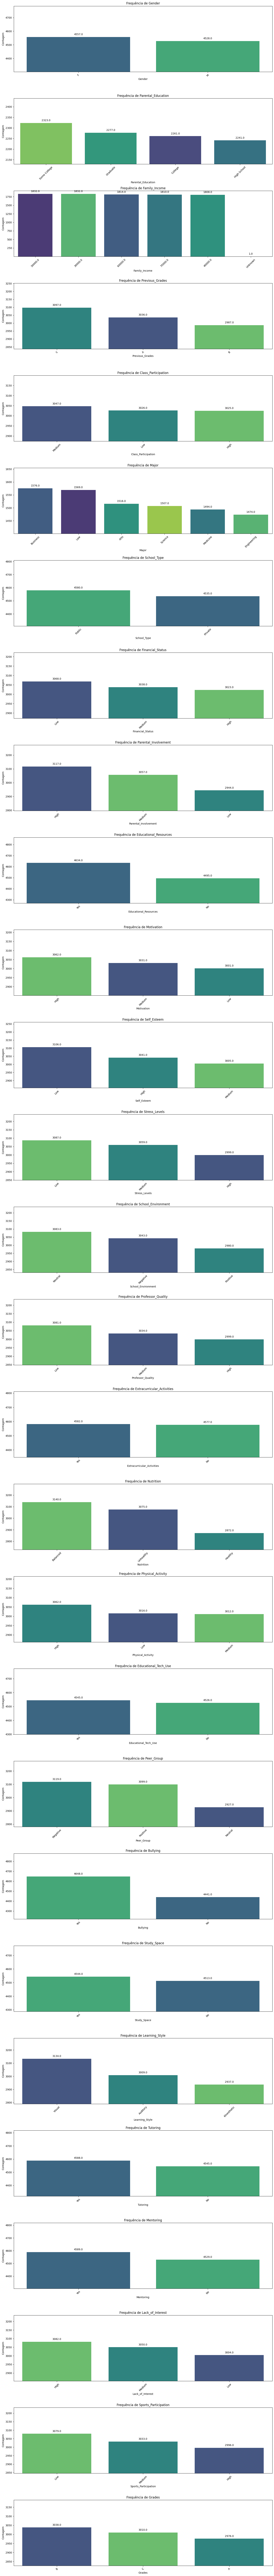

In [69]:
lista_cat_col = cat_col.tolist()
cat_vars = lista_cat_col

cat_plots = len(cat_vars)
num_cols = 1
num_linhas = math.ceil(cat_plots / num_cols)

plt.figure(figsize=(15, 5 * num_linhas))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(num_linhas, num_cols, i)
    ax = sns.countplot(data=df_unistudents, x=var, order=df_unistudents[var].value_counts().index, palette="viridis", hue=var, legend=False)
    
    max_count = df_unistudents[var].value_counts().max()
    min_count = df_unistudents[var].value_counts().min()
    
    # Ajustar o limite do eixo y para focar na parte superior das barras
    plt.ylim(min_count - min_count * 0.05, max_count + max_count * 0.05)
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.title(f'Frequência de {var}')
    plt.xticks(rotation=45)
    plt.xlabel(var)
    plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

# Análise Multivariada - Correlação entre Variáveis Numéricas

Nesta etapa, vamos investigar a correlação entre as variáveis numéricas do dataset.  
O objetivo é identificar:
- Relações fortes ou fracas entre variáveis contínuas.
- Possíveis preditores da frequência escolar e das horas de estudo (`Attendance`, `Study_Hours`).


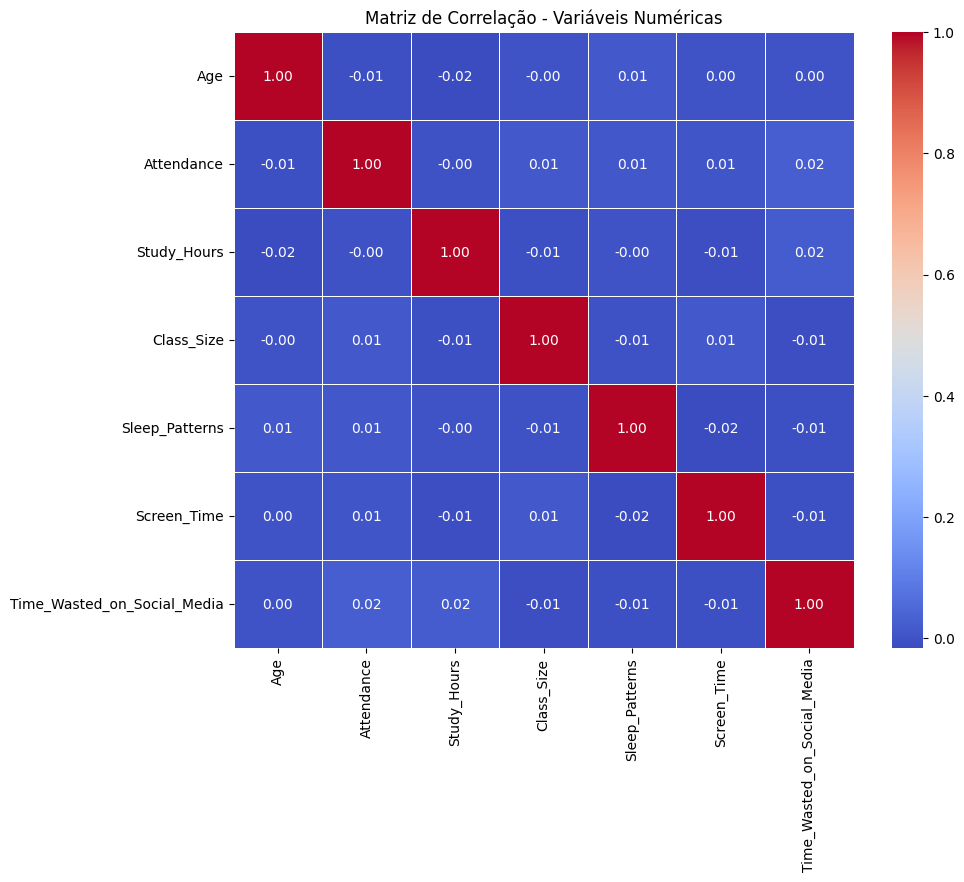

In [81]:
# matriz_corr=df_unistudents[num_col].corr()

# mascara=np.triu(np.ones_like(matriz_corr,dtype=bool))
# sns.heatmap(matriz_corr,annot=True,mask=mascara,cmap= 'coolwarm')

correlation_matrix = df_unistudents[lista_num_col].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação - Variáveis Numéricas")
plt.show()


# Ajuste da Análise Multivariada - Exploração de Correlações Significativas

Com base na matriz de correlação, decidimos focar nas seguintes relações:
1. `Attendance` e `Time_Wasted_on_Social_Media`: Apresenta uma correlação baixa positiva (0.024).
2. `Sudy_Hours` e `Time_Wasted_on_Social_Media`: Correlação baixa positiva (0.02).
3. `Screen_Time` e `Sleep_Patterns`: Correlação fraca positiva (-0.016).

## Perguntas a serem exploradas:
- xxx?
- xxx?
- xxx?


#### Plotagem dos valores faltantes/nulos

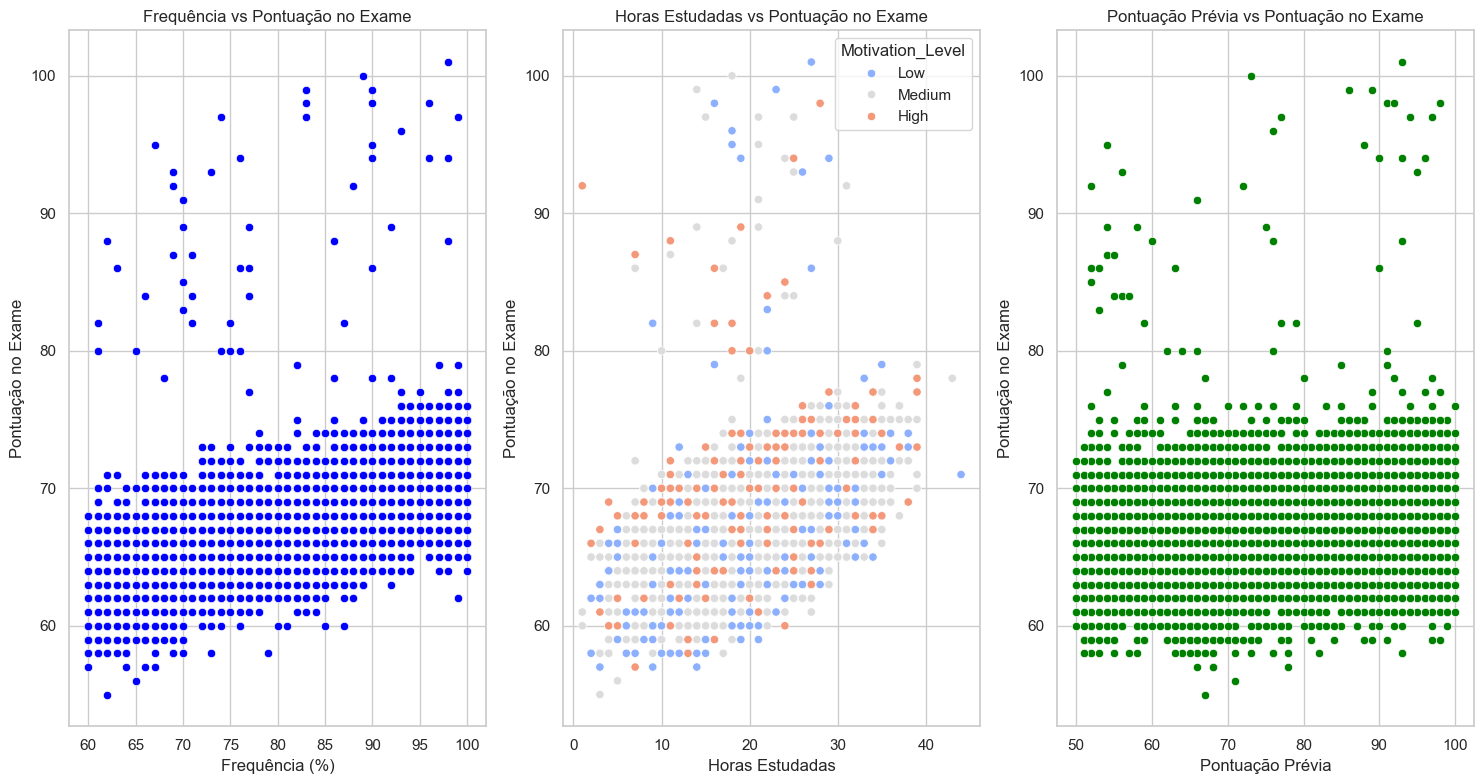

In [ ]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df_students, x='Attendance', y='Exam_Score', color='blue')
plt.title('Frequência vs Pontuação no Exame')
plt.xlabel('Frequência (%)')
plt.ylabel('Pontuação no Exame')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df_students, x='Hours_Studied', y='Exam_Score', hue='Motivation_Level', palette='coolwarm')
plt.title('Horas Estudadas vs Pontuação no Exame')
plt.xlabel('Horas Estudadas')
plt.ylabel('Pontuação no Exame')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df_students, x='Previous_Scores', y='Exam_Score', color='green')
plt.title('Pontuação Prévia vs Pontuação no Exame')
plt.xlabel('Pontuação Prévia')
plt.ylabel('Pontuação no Exame')

plt.tight_layout()
plt.show()


Podemos observar que horas estudadas é uma variável importante para o desempenho no exame, vamos dar uma olhada como o nível de motivação impacta nas horas estudadas também:

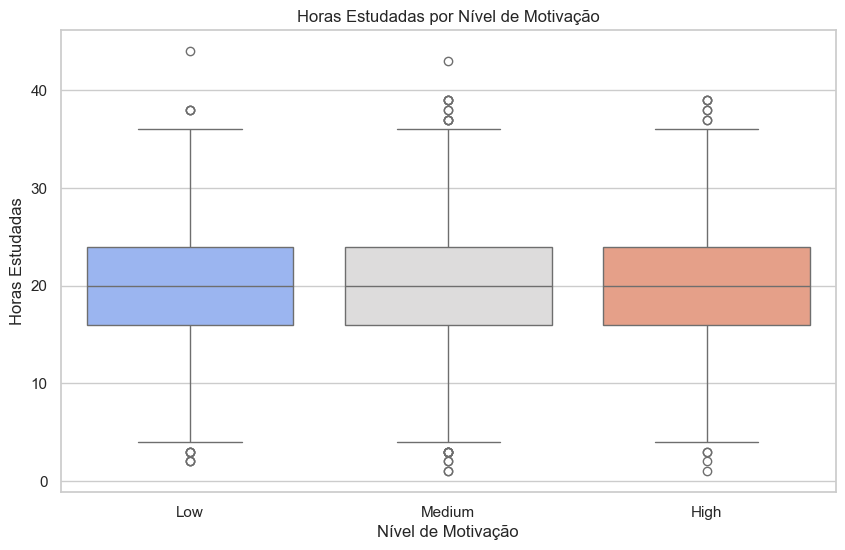

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_students, x='Motivation_Level', y='Hours_Studied', palette='coolwarm', hue='Motivation_Level')
plt.title('Horas Estudadas por Nível de Motivação')
plt.xlabel('Nível de Motivação')
plt.ylabel('Horas Estudadas')
plt.show()


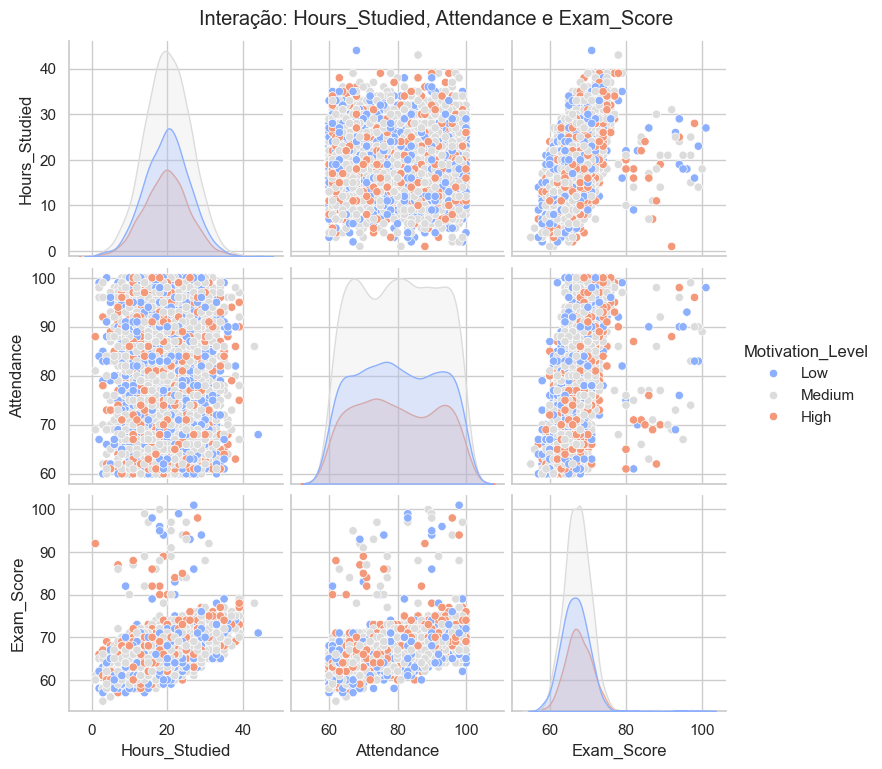

In [ ]:
sns.pairplot(df_students, vars=['Hours_Studied', 'Attendance', 'Exam_Score'], hue='Motivation_Level', palette='coolwarm')
plt.suptitle('Interação: Hours_Studied, Attendance e Exam_Score', y=1.02)
plt.show()


C:\Users\Ronaldo\AppData\Local\Temp\ipykernel_17540\2229255146.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentual_faltante.values, y=percentual_faltante.index, palette='viridis')


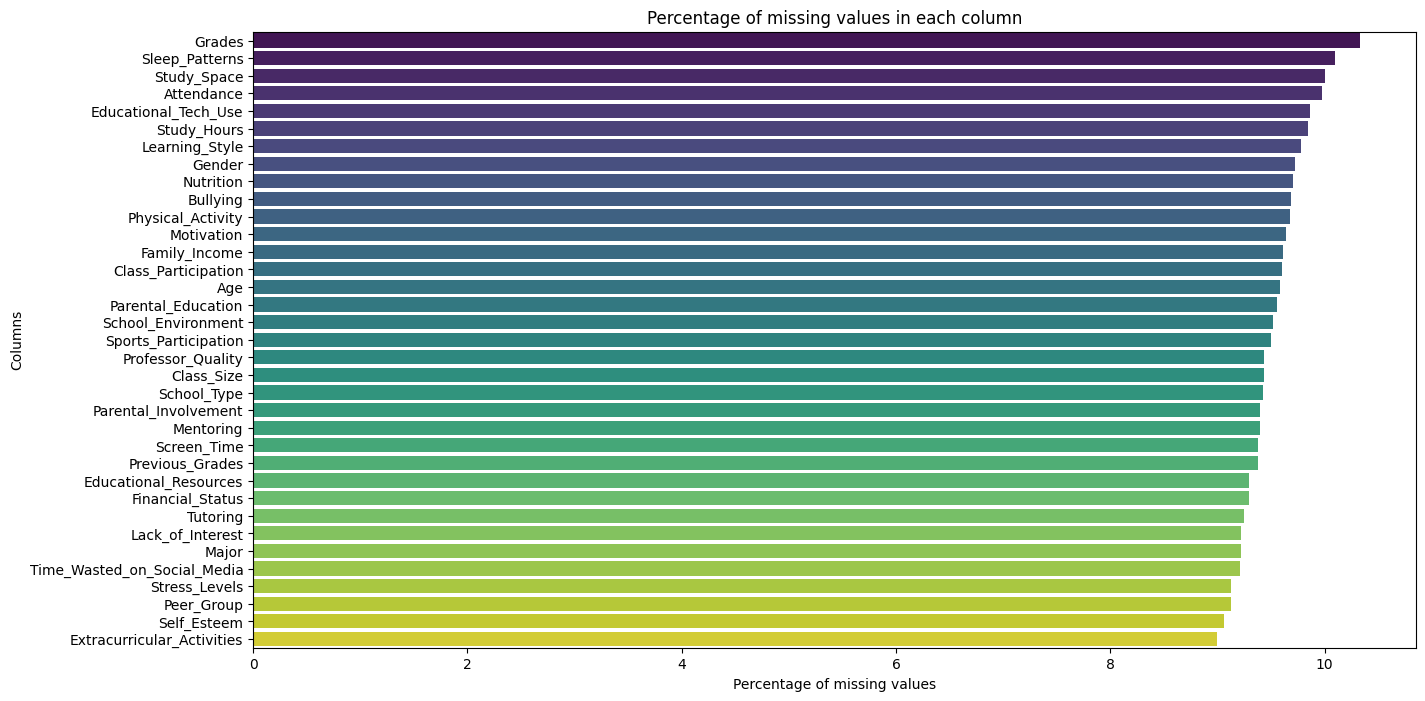

In [79]:
def plotar_valores_faltantes(df):
    percentual_faltante = df.isnull().sum() / len(df) * 100

    percentual_faltante = percentual_faltante[percentual_faltante > 0]
    
    percentual_faltante.sort_values(ascending=False, inplace=True)
    
    # Plot missing values
    plt.figure(figsize=(15,8))
    sns.barplot(x=percentual_faltante.values, y=percentual_faltante.index, palette='viridis')
    plt.xlabel('Percentage of missing values')
    plt.ylabel('Columns')
    plt.title('Percentage of missing values in each column')
    plt.show()

# Call the function
plotar_valores_faltantes(df_unistudents)